# Vorstellung des Datensatzes:

Der Datensatz haben wir von Kaggle heruntergeladen. Die Daten für den Human Development Index stammen aus UNDP (2018), die Daten für das jährliche BIP (ggf. pro Kopf) stammen aus der Weltbank (World Bank World Development Indicators, 2018) und die Date für die Suizidraten stammen aus "Suicide in the Twenty-First Century" von Szamil (2017) sowie aus der WHO ("Suicide prevention", 2018). Der CSV-Datensatz ist in Long Format und beschreibt die Entwicklung der Suizidraten nach Altersgruppen, Generationen und Geschlechtern für verschiedene Länder in dem Zeitraum 1985 bis 2016. Gleichzeitig haben wir in benachbarten Spalten Daten zum BIP, zum Pro-Kopf-BIP (jeweils in gegenwärtigen US-Dollar) und zum HDI, was Rahmen für interessante Analyse anbietet. Damit wir uns mit dem Datensatz vertraut machen, lesen wir ihn mit Hilfe von Pandas in Python ein:

In [1]:
# Alle notwendige Bibliotheken Laden
import pandas as pd #wir importieren erstmal pandas (mit Abkürzung "pd"), um die Funktionen der Bibliothek anwenden zu können
import numpy as np
import matplotlib.pyplot as plt #importiert die Bibliothek mit Kürzel "plt"

%matplotlib inline 

In [2]:
suizid_file = "daten/master.csv"
suizid_daten=pd.read_csv(suizid_file)
suizid_daten.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
# Liste aller unterschiedlichen Altersgruppen
alters_gruppen = ["5-14 years", "15-24 years", "25-34 years", "35-54 years", "55-74 years", "75+ years"]
print(alters_gruppen)

['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']


Wir sehen, dass wir pro Jahr für jedes Land Daten zu 6 verschiedenen Altersgruppen (jeweils nach Geschlecht) haben.

# Verteilung der Suzidenraten nach Altersgruppen & Geschlecht

In [4]:
# Daten nach Altersgruppen & Geschlecht filtrieren
def filter_daten(daten, year, age, sex):
    if year is not "alle":
        return daten[(daten["year"] == year) & (daten["age"] == age) & (suizid_daten["sex"] == sex)]
    else:
        return daten[(daten["age"] == age) & (suizid_daten["sex"] == sex)]

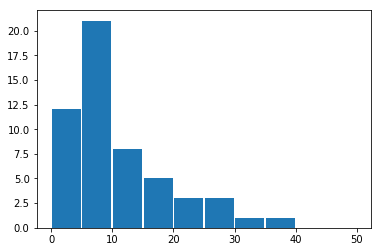

In [5]:
plt.hist(filter_daten(suizid_daten, 1987, "15-24 years", "male")["suicides/100k pop"], range=[0,50], bins=10, rwidth=0.95);

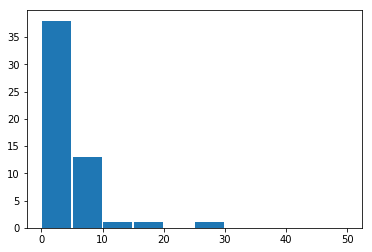

In [6]:
plt.hist(filter_daten(suizid_daten, 1987, "15-24 years", "female")["suicides/100k pop"], range=[0,50], bins=10, rwidth=0.95);


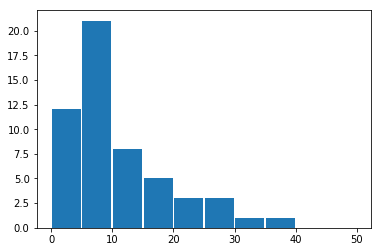

In [7]:
plt.hist(filter_daten(suizid_daten, 1987, "15-24 years", "male")["suicides/100k pop"], range=[0,50], bins=10, rwidth=0.95);


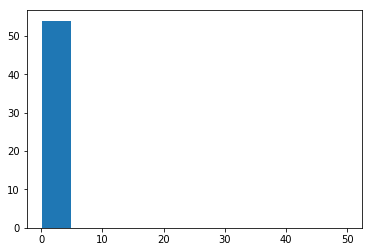

In [8]:
plt.hist(filter_daten(suizid_daten, 1987, "5-14 years", "male")["suicides/100k pop"], range=[0,50], bins=10, rwidth=0.95);


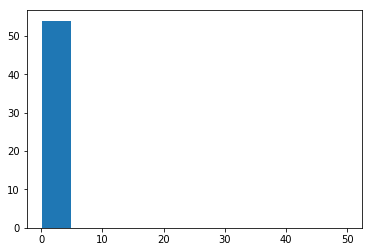

In [9]:
plt.hist(filter_daten(suizid_daten, 1987, "5-14 years", "female")["suicides/100k pop"], range=[0,50], bins=10, rwidth=0.95);


In [10]:
# '5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years'



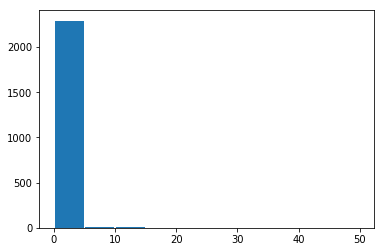

In [11]:
plt.hist(filter_daten(suizid_daten, "alle", "5-14 years", "female")["suicides/100k pop"], range=[0,50], bins=10, rwidth=0.95);


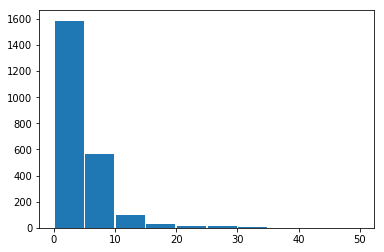

In [12]:
plt.hist(filter_daten(suizid_daten, "alle", "15-24 years", "female")["suicides/100k pop"], range=[0,50], bins=10, rwidth=0.95);


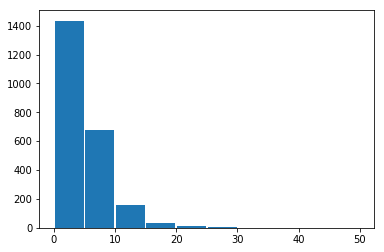

In [13]:
plt.hist(filter_daten(suizid_daten, "alle", "25-34 years", "female")["suicides/100k pop"], range=[0,50], bins=10, rwidth=0.95);


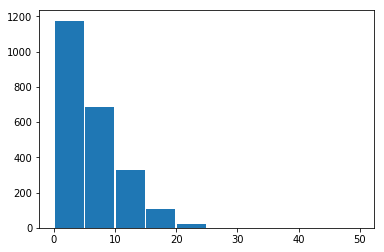

In [14]:
plt.hist(filter_daten(suizid_daten, "alle", "35-54 years", "female")["suicides/100k pop"], range=[0,50], bins=10, rwidth=0.95);


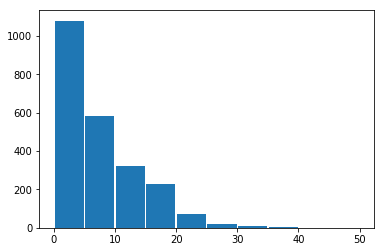

In [15]:
plt.hist(filter_daten(suizid_daten, "alle", "55-74 years", "female")["suicides/100k pop"], range=[0,50], bins=10, rwidth=0.95);


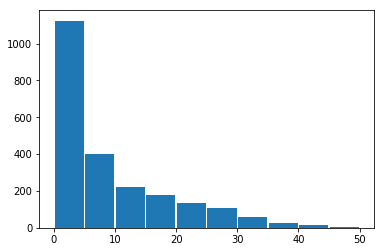

In [16]:
plt.hist(filter_daten(suizid_daten, "alle", "75+ years", "female")["suicides/100k pop"], range=[0,50], bins=10, rwidth=0.95);


In [30]:
suzidraten_haufigkeit = pd.DataFrame()
for alters_gruppe in alters_gruppen:
    suzidraten_haufigkeit[alters_gruppe] = np.histogram([filter_daten(suizid_daten, "alle", alters_gruppe, "male")["suicides/100k pop"]], bins=10, range=[0, 50])[0]
    


# erstelle Kategorien Namen für Suizidraten
suizid_raten_kategorien = ["{} bis {}".format(start, start + 5) for start in np.arange(0, 50, 5)]
# Damit die Spalten Names umbennant werden
suzidraten_haufigkeit.rename(index={index: value for index, value in enumerate(suizid_raten_kategorien)}, inplace=True)
suzidraten_haufigkeit


    


,5-14 years,15-24 years,25-34 years,35-54 years,55-74 years,75+ years
0 bis 5,2284,488,350,297,350,433
5 bis 10,18,515,310,303,248,132
10 bis 15,2,511,391,316,264,201
15 bis 20,1,302,356,228,263,170
20 bis 25,0,203,279,329,254,140
25 bis 30,0,126,217,243,194,127
30 bis 35,0,52,133,129,167,128
35 bis 40,0,46,57,128,130,105
40 bis 45,0,33,53,86,105,102
45 bis 50,0,22,30,43,78,77


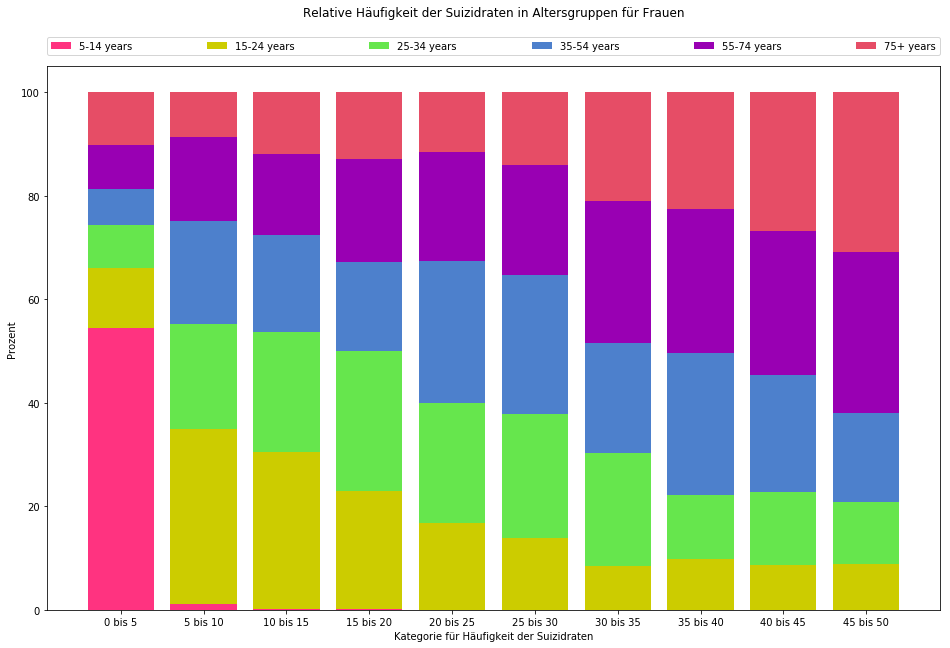

In [31]:
names = suizid_raten_kategorien
df = suzidraten_haufigkeit

# Get the %
for i in df.index:
    df.loc[i]=df.loc[i]*100/sum(df.loc[i])

# Plotting
r=range(len(names))
btm=df.iloc[:,0]-df.iloc[:,0] # Looks horrible, I know, enjoy it

stack_order= alters_gruppen# If the original column order is fine, skip it
colors = ['#FF3380', '#CCCC00', '#66E64D', '#4D80CC', '#9900B3', 
          '#E64D66']

plt.figure(figsize=(16,10))
for i,j in zip(stack_order,colors): # If the original column order is fine, just replace “stack_order” for “df”
    plt.bar(r,df[i],bottom=btm,color=j,label=i)
    btm=btm+df[i]
    

plt.xticks(r, names)
plt.xlabel("Kategorie für Häufigkeit der Suizidraten")
plt.ylabel("Prozent")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=6, mode="expand", borderaxespad=0)
plt.title("Relative Häufigkeit der Suizidraten in Altersgruppen für Frauen", pad=50)
plt.show()

   greenBars  orangeBars  blueBars
A       20.0           5         2
B        1.5          15        15
C        7.0           5        18
D       10.0          10         5
E        5.0          15        10
   greenBars  orangeBars   blueBars
A  74.074074   18.518519   7.407407
B   4.761905   47.619048  47.619048
C  23.333333   16.666667  60.000000
D  40.000000   40.000000  20.000000
E  16.666667   50.000000  33.333333
A    0.0
B    0.0
C    0.0
D    0.0
E    0.0
Name: greenBars, dtype: float64
greenBars green
orangeBars orange
blueBars blue


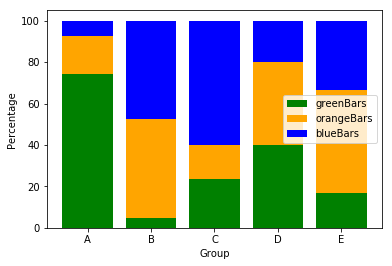

In [19]:
names = ["A","B","C","D","E"]
raw_data = {"greenBars": [20, 1.5, 7, 10, 5], "orangeBars": [5, 15, 5, 10, 15],"blueBars": [2, 15, 18, 5, 10]}
df = pd.DataFrame(raw_data,index=names)

print(df.head())

# Get the %
for i in df.index:
    df.loc[i]=df.loc[i]*100/sum(df.loc[i])

print(df.head())
# Plotting
r=range(len(names))
btm=df.iloc[:,0]-df.iloc[:,0] # Looks horrible, I know, enjoy it

print(btm)

stack_order=["greenBars","orangeBars","blueBars"] # If the original column order is fine, skip it
colors=["green","orange","blue"]

for i,j in zip(stack_order,colors): # If the original column order is fine, just replace “stack_order” for “df”
    print(i, j)
    plt.bar(r,df[i],bottom=btm,color=j,label=i)
    btm=btm+df[i]

plt.legend()
plt.xticks(r, names)
plt.xlabel("Group")
plt.ylabel("Percentage")
plt.show()

# Suiziden in Japan

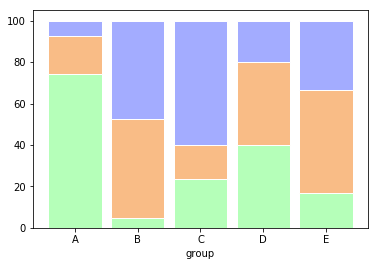

In [20]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd

# Data
r = [0,1,2,3,4]
raw_data = {'greenBars': [20, 1.5, 7, 10, 5], 'orangeBars': [5, 15, 5, 10, 15],'blueBars': [2, 15, 18, 5, 10]}
df = pd.DataFrame(raw_data)

# From raw value to percentage
totals = [i+j+k for i,j,k in zip(df['greenBars'], df['orangeBars'], df['blueBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
blueBars = [i / j * 100 for i,j in zip(df['blueBars'], totals)]

# plot
barWidth = 0.85
names = ('A','B','C','D','E')
# Create green Bars
plt.bar(r, greenBars, color='#b5ffb9', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth)
# Create blue Bars
plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth)

# Custom x axis
plt.xticks(r, names)
plt.xlabel("group")

# Show graphic
plt.show()


Im Folgenden werden wir uns die zeitliche Entwicklung der Suizidraten japanischer Männer anschauen, die von 25 bis 54 Jahre alt sind.

In [21]:
japan_filter = suizid_daten["country"]=="Japan" #wir schaffen eine Maske für das Land "Japan"
japan = suizid_daten[japan_filter] #und benutzen diese Maske, um das ursprüngliche DataFrame entsprechend zu filtern
altersgruppe_filter = japan["age"]=="35-54 years" #mit einer Maske wird eine Liste mit "True"/"False"-Werte erzeugt
japan_mittelalt = japan[altersgruppe_filter] #falls "True", wird bleibt die Zeile, falls "False", verschwindet die Zeile
mann_filter = japan_mittelalt["sex"] == "male" #wir wählen nur die Männer aus
japan_35_54_mann = japan_mittelalt[mann_filter] #und filtern
japan_35_54_mann.head(5) #wir lassen uns das Ergebnis anzeigen, damit wir prüfen, ob alles richtig ist

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
13367,Japan,1985,male,35-54 years,6962,17833300,39.04,Japan1985,0.791,"1,398,892,744,821",12401,Silent
13379,Japan,1986,male,35-54 years,7298,18094000,40.33,Japan1986,NaN,"2,078,953,333,674",18288,Silent
13391,Japan,1987,male,35-54 years,6688,18218000,36.71,Japan1987,NaN,"2,532,808,573,157",22137,Silent
13403,Japan,1988,male,35-54 years,6087,18287000,33.29,Japan1988,NaN,"3,071,683,013,179",26687,Silent
13415,Japan,1989,male,35-54 years,5161,18310000,28.19,Japan1989,NaN,"3,054,914,166,263",26389,Silent


Nun werden wir mit matplotlib den zeitlichen Trend visualisieren:

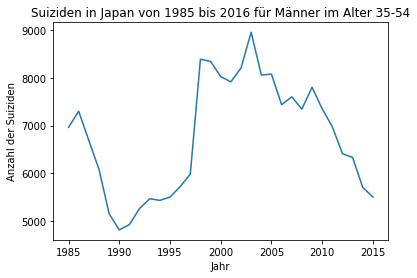

In [22]:
plt.plot(japan_35_54_mann["year"], japan_35_54_mann["suicides_no"], label="35-54") #x-Achse sei Jahr, y-Achse sei Suizidanzahl
plt.xlabel("Jahr") #wir betiteln die x-Achse
plt.ylabel("Anzahl der Suiziden") #Wir betiteln die y-Achse
plt.title("Suiziden in Japan von 1985 bis 2016 für Männer im Alter 35-54") #Wir betiteln die Grafik
plt.show()
plt.close()

Es lassen sich mehrkwürdige "Sprünge" in den Suiziden für diese Gruppe erkennen. Man kann sich die Frage stellen, was in den Jahren 1990 bis 1999 in Japan passiert ist, sodass die Anzahl der Suiziden für die Männer im Alter 35-54 so stark angestiegen ist. Interessant ist, ob ein vergleichbarer Trend in anderen japanischen Altersgruppen und bei den Frauen vorliegt.
Nun wollen wir uns die Entwicklungen zwischen verschiedenen Altersgruppen vergleichen:

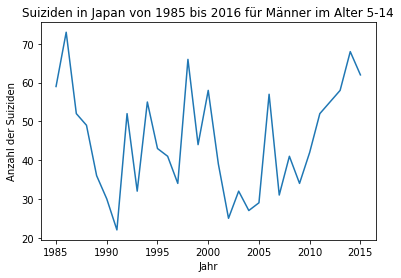

In [23]:
altersgruppe_filter = japan["age"]=="5-14 years"
japan_mittelalt = japan[altersgruppe_filter] 
mann_filter = japan_mittelalt["sex"] == "male" 
japan_5_14_mann = japan_mittelalt[mann_filter] #nun haben wir Jungen im Alter von 5 bis 15 Jahren ausgewählt.

plt.plot(japan_5_14_mann["year"], japan_5_14_mann["suicides_no"], label="5-14") #x-Achse sei Jahr, y-Achse sei Suizidanzahl
plt.xlabel("Jahr") #wir betiteln die x-Achse
plt.ylabel("Anzahl der Suiziden") #Wir betiteln die y-Achse
plt.title("Suiziden in Japan von 1985 bis 2016 für Männer im Alter 5-14") #Wir betiteln die Grafik
plt.show()
plt.close()

Zum einfacheren Vergleich lassen wir uns die Trends für beide Altersgruppen zusammen anzeigen:

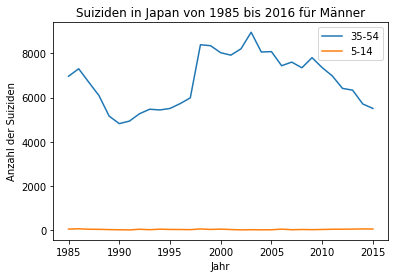

In [24]:
plt.plot(japan_35_54_mann["year"], japan_35_54_mann["suicides_no"], label="35-54") #x-Achse sei Jahr, y-Achse sei Suizidanzahl

plt.plot(japan_5_14_mann["year"], japan_5_14_mann["suicides_no"], label="5-14") #x-Achse sei Jahr, y-Achse sei Suizidanzahl
plt.xlabel("Jahr") #wir betiteln die x-Achse
plt.ylabel("Anzahl der Suiziden") #Wir betiteln die y-Achse
plt.title("Suiziden in Japan von 1985 bis 2016 für Männer") #Wir betiteln die Grafik
plt.legend()
plt.show()

In der neuen "zusammengefügten" Grafik lassen sich die Schwankungen der jüngeren Altersgruppe, die aber in der vorgerigen Grafik offensichtlich waren, nicht erkennen. Hier hat man den Eindruck, dass der Trend gleich geblieben ist und es keine Schwankungen für die Jungen von 5 bis 14 Jahre vorliegen. Der Grund ist, dass die Anzahl der Suiziden für die jüngere Gruppe ungefähr von 25 bis 75 schwankt, währendessen für die Altersgruppe 35 bis 54 die gleiche Größe ungefähr von 4500 bis 8600 schwankt. In relativer Betrachtung ist die Anzahl der Suiziden für die junge Altersgruppe ohne große Bedeutung. Da es um eine (relativ) sehr geringe Anzahl von Suiziden handelt, ist es weniger wahrscheinlich, dass die einzelnen Schwankungen durch allgemeine Ereignisse und geschichtliche Hintergründe erklärt werden können. 
Wir wollen auch andere Altersgruppen (und Altersgruppen nach Geschlecht) miteinander ebenfalls vergleichen, aber für jede Gruppe code zu schreiben wäre zu mühsam. Wir benutzen loops:

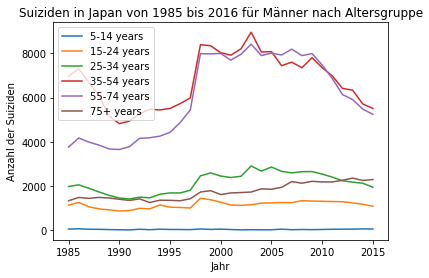

In [25]:
altersgruppenliste=["5-14 years", "15-24 years", "25-34 years", "35-54 years", "55-74 years", "75+ years"]
#wir haben eine Liste erstellt, welche im loop benutzt wird, um über alle Altersgruppen zu iterieren
for i in altersgruppenliste: #Schleife fängt an
    altersgruppe_filter = japan["age"] == i #Iteration über ALtersgruppen
    japan_altersgruppe = japan[altersgruppe_filter] 
    mann_filter = japan_altersgruppe["sex"] == "male" 
    japan_mann = japan_altersgruppe[mann_filter]
    plt.plot(japan_mann["year"], japan_mann["suicides_no"], label="{}".format(i)) #x-Achse sei Jahr, y-Achse sei Suizidanzahl
plt.xlabel("Jahr") #wir betiteln die x-Achse
plt.ylabel("Anzahl der Suiziden") #Wir betiteln die y-Achse
plt.title("Suiziden in Japan von 1985 bis 2016 für Männer nach Altersgruppe") #Wir betiteln die Grafik
plt.legend()

Nun haben wir die zeitliche Entwicklung der Suizidanzahl für alle Altersgruppen japanischer Männer in einer Grafik visualisiert. In allen Altersgruppen außer der jüngsten Kategorie kann man sehen, das die Suiziden im Zeitraum 1995-2000 bemerkenswert angestiegen sind. Wir wollen uns nun diesen Zeitraum näher anschauen: 

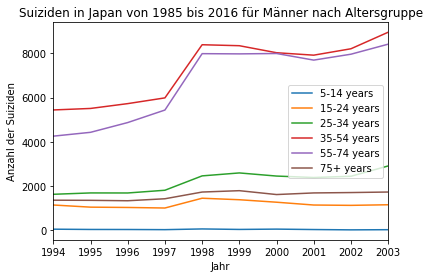

In [26]:
for i in altersgruppenliste: 
    altersgruppe_filter = japan["age"] == i
    japan_altersgruppe = japan[altersgruppe_filter] 
    mann_filter = japan_altersgruppe["sex"] == "male" 
    japan_mann = japan_altersgruppe[mann_filter]
    plt.plot(japan_mann["year"], japan_mann["suicides_no"], label="{}".format(i)) #x-Achse sei Jahr, y-Achse sei Suizidanzahl
plt.xlabel("Jahr") #wir betiteln die x-Achse
plt.ylabel("Anzahl der Suiziden") #Wir betiteln die y-Achse
plt.title("Suiziden in Japan von 1985 bis 2016 für Männer nach Altersgruppe") #Wir betiteln die Grafik
plt.xlim(1994,2003) #wir schauen uns nur die Jahre 1993 bis 2003 an
plt.legend()

Bei näherer Betrachtung sehen wir, dass der "plötzliche" Anstieg der Suiziden von 1997 auf 1998 passiert ist. Es ist interessant, ob in den Jahren 1997-1998 etwas in Japan passiert ist, was diesen bemerkenswerten Anstieg der Anzahl Suiziden (für fast alle Altersgruppen) erklären könnte.

Ein Blick in die Geschichte zeigt uns, dass Anfang 1995 das Erdbeben von Kobe stattgefunden hat. Durch das Erdbeben (und seine unmittelbaren Folgen) sind über 4.000 Menschen gestorben, fast 15.000 Menschen wurden verletzt. Zudem sind ca. 300.000 Menschen obdachlos geworden. Eine mögliche Erklärung wäre, dass wegen des zwingenden Umzugs ihr Alltag sich drastisch geändert hat, was zu vielen unterschiedlichen Komplikationen in ihren Leben geführt hat. Dieser Prozess dauert vermutlich einige Jahre, und daher ist es vorstellbar, dass dieser Effekt erst 1997 in vermehrten Suiziden sich ausgedrückt hat.

Eine plausiblere Erklärung wäre die Finanzkrise Asiens, die 1997 anfing und negative Auswirkungen auf die ostasiatischen Länder hatte. Japan war auch betroffen und es gab eine Rezession. Viele Menschen haben ihre Arbeitsplätze und somit Einkommensquellen verloren, was den Anstieg der Suiziden ausgelöst haben könnte.

Es wäre gut, mit diesem Ansatz auch andere Länder zu betrachten. Es wäre aber zu aufwendig, für jedes Land den Code neu zu schreiben. Deshalb erstellen wir dafür eine eigene Funktion, die den Prozess beschleunigt und vereinfacht:

In [27]:
def landanalyse(argument):
    altersgruppenliste=["5-14 years", "15-24 years", "25-34 years", "35-54 years", "55-74 years", "75+ years"]
    geschlecht=["male", "female"]
    land_filter = suizid_daten["country"]==argument 
    land = suizid_daten[land_filter] 
    for g in geschlecht:
            for i in altersgruppenliste: 
                altersgruppe_filter = land["age"] == i 
                land_altersgruppe = land[altersgruppe_filter] 
                geschlecht_filter = land_altersgruppe["sex"] == "male" 
                land_geschlecht = land_altersgruppe[geschlecht_filter]
                plt.plot(land_geschlecht["year"], land_geschlecht["suicides_no"], label="{}".format(i)) 
            plt.xlabel("Jahr") 
            plt.ylabel("Anzahl der Suiziden")
            zeilenliste = list(range(len(land_geschlecht["sex"])))
            for p in zeilenliste:
                if land_geschlecht["sex"][3] == "male":                
                    plt.title("Suiziden in {} von 1985 bis 2016 für Männer nach Altersgruppe".format(argument))
                else:
                    plt.title("Suiziden in {} von 1985 bis 2016 für Frauen nach Altersgruppe".format(argument))
            plt.legend()

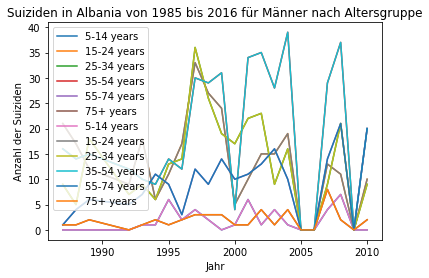

In [28]:
landanalyse("Albania")

In [29]:
japan_mann["sex"][13364]

'male'